In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 录入角色和武器数据

In [2]:
characters = pd.DataFrame(
    [
        ['迪卢克', '双手剑', 335, .005 + .192, 0.5],
    ],
    columns=['名字', '武器类型', '攻击力', '暴击率', '暴击伤害'],
)

characters

,名字,武器类型,攻击力,暴击率,暴击伤害
0,迪卢克,双手剑,335,0.197,0.5


In [3]:
weapons = pd.DataFrame(
    [
        ['狼的末路', '双手剑', 608, .496, 0, 0],
        ['螭骨剑', '双手剑', 510, 0, .276, 0],
        ['试作古华', '双手剑', 565, .276, 0, 0],
        
    ],
    columns=['名称', '武器类型', '攻击力', '百分比攻击力', '暴击率', '暴击伤害'],
)

weapons

,名称,武器类型,攻击力,百分比攻击力,暴击率,暴击伤害
0,狼的末路,双手剑,608,0.496,0.000,0
1,螭骨剑,双手剑,510,0.000,0.276,0
2,试作古华,双手剑,565,0.276,0.000,0


# 枚举主副词条

In [4]:
attr_names = [
    '主_百分比攻击力', 
    '主_元素伤害', 
    '主_暴击率', 
    '主_暴击伤害',
    '副_数值攻击力',
    '副_百分比攻击力',
    '副_暴击率',
    '副_暴击伤害',
]
attr_values = [.466, .466, .311, .622, 17, .05, .033, .066]

In [5]:
def subtitle(cup, hat):
    values = [0] * (len(attr_names) * 2)
    
    # 沙漏选攻击力
    half_len = int(len(values) / 2)
    values[0] = .466
    values[half_len] = 1
    
    # 录入主词条
    values[cup] += attr_values[cup]
    values[hat] += attr_values[hat]
    values[half_len + cup] += 1
    values[half_len + hat] += 1
    
    # 初始出现的副词条（假设最好的情况）
    ini_attack = 4
    ini_pattack = 5 - values[half_len]
    ini_cchance = 5 - values[half_len + 2]
    ini_cdamage = 5 - values[half_len + 3]
    
    # 升级出现的副词条
    max_idx_attack = min(ini_attack * 5, 25)
    for idx_attack in range(max_idx_attack + 1):
        max_idx_pattack = min(idx_attack + ini_pattack * 5, 25)
        for idx_pattack in range(idx_attack, max_idx_pattack + 1):
            max_idx_cchance = min(idx_pattack + ini_cchance * 5, 25)
            for idx_cchance in range(idx_pattack, max_idx_cchance + 1):
                max_idx_cdamage = idx_cchance + ini_cdamage * 5
                if max_idx_cdamage < 25:
                    continue
                up_attack = idx_attack
                up_pattack = idx_pattack - idx_attack
                up_cchance = idx_cchance - idx_pattack
                up_cdamage = 25 - idx_cchance
                values[half_len + 4] = ini_attack + up_attack
                values[half_len + 5] = ini_pattack + up_pattack
                values[half_len + 6] = ini_cchance + up_cchance
                values[half_len + 7] = ini_cdamage + up_cdamage
                values[4] = values[half_len + 4] * attr_values[4]
                values[5] = values[half_len + 5] * attr_values[5]
                values[6] = values[half_len + 6] * attr_values[6]
                values[7] = values[half_len + 7] * attr_values[7]
                equip_values.loc[len(equip_values)] = values

In [6]:
attr_cols = attr_names + [name + '_次数' for name in attr_names]
equip_values = pd.DataFrame(columns=attr_cols)

for cup in [0, 1]:
    for hat in [0, 2, 3]:
        subtitle(cup, hat)

equip_values.insert(0, '主_数值攻击力', 311)

equip_values.head(10)

,主_数值攻击力,主_百分比攻击力,主_元素伤害,主_暴击率,主_暴击伤害,副_数值攻击力,副_百分比攻击力,副_暴击率,副_暴击伤害,主_百分比攻击力_次数,主_元素伤害_次数,主_暴击率_次数,主_暴击伤害_次数,副_数值攻击力_次数,副_百分比攻击力_次数,副_暴击率_次数,副_暴击伤害_次数
0,311,1.398,0.0,0.0,0.0,68.0,0.1,0.165,1.980,3.0,0.0,0.0,0.0,4.0,2.0,5.0,30.0
1,311,1.398,0.0,0.0,0.0,68.0,0.1,0.198,1.914,3.0,0.0,0.0,0.0,4.0,2.0,6.0,29.0
2,311,1.398,0.0,0.0,0.0,68.0,0.1,0.231,1.848,3.0,0.0,0.0,0.0,4.0,2.0,7.0,28.0
3,311,1.398,0.0,0.0,0.0,68.0,0.1,0.264,1.782,3.0,0.0,0.0,0.0,4.0,2.0,8.0,27.0
4,311,1.398,0.0,0.0,0.0,68.0,0.1,0.297,1.716,3.0,0.0,0.0,0.0,4.0,2.0,9.0,26.0
5,311,1.398,0.0,0.0,0.0,68.0,0.1,0.330,1.650,3.0,0.0,0.0,0.0,4.0,2.0,10.0,25.0
6,311,1.398,0.0,0.0,0.0,68.0,0.1,0.363,1.584,3.0,0.0,0.0,0.0,4.0,2.0,11.0,24.0
7,311,1.398,0.0,0.0,0.0,68.0,0.1,0.396,1.518,3.0,0.0,0.0,0.0,4.0,2.0,12.0,23.0
8,311,1.398,0.0,0.0,0.0,68.0,0.1,0.429,1.452,3.0,0.0,0.0,0.0,4.0,2.0,13.0,22.0
9,311,1.398,0.0,0.0,0.0,68.0,0.1,0.462,1.386,3.0,0.0,0.0,0.0,4.0,2.0,14.0,21.0


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

origin_names = ['数值攻击力', '百分比攻击力', '元素伤害', '暴击率', '暴击伤害']
for name in origin_names:
    main_value = equip_values['主_' + name]
    sub_value = (
        ('副_' + name) in equip_values.columns and 
        equip_values['副_' + name]
    )
    equip_values['总_' + name] = main_value + sub_value
    
equip_values.head()

,主_数值攻击力,主_百分比攻击力,主_元素伤害,主_暴击率,主_暴击伤害,副_数值攻击力,副_百分比攻击力,副_暴击率,副_暴击伤害,主_百分比攻击力_次数,主_元素伤害_次数,主_暴击率_次数,主_暴击伤害_次数,副_数值攻击力_次数,副_百分比攻击力_次数,副_暴击率_次数,副_暴击伤害_次数,总_数值攻击力,总_百分比攻击力,总_元素伤害,总_暴击率,总_暴击伤害
0,311,1.398,0.0,0.0,0.0,68.0,0.1,0.165,1.980,3.0,0.0,0.0,0.0,4.0,2.0,5.0,30.0,379.0,1.498,0.0,0.165,1.980
1,311,1.398,0.0,0.0,0.0,68.0,0.1,0.198,1.914,3.0,0.0,0.0,0.0,4.0,2.0,6.0,29.0,379.0,1.498,0.0,0.198,1.914
2,311,1.398,0.0,0.0,0.0,68.0,0.1,0.231,1.848,3.0,0.0,0.0,0.0,4.0,2.0,7.0,28.0,379.0,1.498,0.0,0.231,1.848
3,311,1.398,0.0,0.0,0.0,68.0,0.1,0.264,1.782,3.0,0.0,0.0,0.0,4.0,2.0,8.0,27.0,379.0,1.498,0.0,0.264,1.782
4,311,1.398,0.0,0.0,0.0,68.0,0.1,0.297,1.716,3.0,0.0,0.0,0.0,4.0,2.0,9.0,26.0,379.0,1.498,0.0,0.297,1.716


In [8]:
len(equip_values)

17896

In [9]:
# equip_values.groupby(['主_百分比攻击力_次数']).max()

In [10]:
for _, ct in characters.iterrows():
    for _, wp in weapons.iterrows():
        print(ct['名字'], wp['名称'])
        
        # 加成人物和武器的属性
        e_values = equip_values.copy()
        for attr in ct.index[3:]:
            e_values['总_' + attr] += ct[attr]
        for attr in wp.index[3:]:
            e_values['总_' + attr] += wp[attr]
        
        print(ct['攻击力'], wp['攻击力'])
        
        e_values['期望伤害'] = (
            (
                (ct['攻击力'] + wp['攻击力']) *
                (1 + e_values['总_百分比攻击力']) + 
                e_values['总_数值攻击力']
            ) *
            (1 + e_values['总_元素伤害']) *
            (
                1 + 
                e_values['总_暴击率'].where(e_values['总_暴击率'] < 1, 1) * 
                e_values['总_暴击伤害']
            )
        )
        
        print(e_values.sort_values('期望伤害', ascending=False).iloc[:5])
        
        (e_values.sort_values('期望伤害', ascending=False)
         .to_csv(ct['名字'] + '_' + wp['名称'] + '.csv'))

迪卢克 狼的末路
335 608
       主_数值攻击力  主_百分比攻击力  主_元素伤害  主_暴击率  主_暴击伤害  副_数值攻击力  副_百分比攻击力  副_暴击率  \
11563      311     0.466   0.466  0.311   0.000     68.0       0.2  0.429   
14738      311     0.466   0.466  0.000   0.622     68.0       0.2  0.759   
14737      311     0.466   0.466  0.000   0.622     68.0       0.2  0.726   
11564      311     0.466   0.466  0.311   0.000     68.0       0.2  0.462   
11562      311     0.466   0.466  0.311   0.000     68.0       0.2  0.396   

       副_暴击伤害  主_百分比攻击力_次数  主_元素伤害_次数  主_暴击率_次数  主_暴击伤害_次数  副_数值攻击力_次数  \
11563   1.386          1.0        1.0       1.0        0.0         4.0   
14738   0.726          1.0        1.0       0.0        1.0         4.0   
14737   0.792          1.0        1.0       0.0        1.0         4.0   
11564   1.320          1.0        1.0       1.0        0.0         4.0   
11562   1.452          1.0        1.0       1.0        0.0         4.0   

       副_百分比攻击力_次数  副_暴击率_次数  副_暴击伤害_次数  总_数值攻击力  总_百分比攻击力  总_元素伤害  总_暴击率  

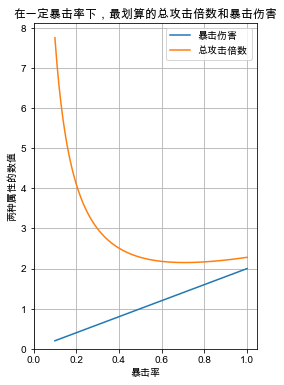

In [32]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

cchance = np.arange(0.1, 1.01, 0.01)
cdamage = cchance * 2
attack_ratio = 1.52 * (1/(2*cchance) + cchance)

fig, ax = plt.subplots(figsize=(4, 6))
ax.plot(cchance, cdamage, label='暴击伤害')
ax.plot(cchance, attack_ratio, label='总攻击倍数')
ax.set_title('在一定暴击率下，最划算的总攻击倍数和暴击伤害')
ax.set_ylabel('两种属性的数值')
ax.set_xlabel('暴击率')
ax.legend(loc='best')
ax.set_ylim(0)
ax.set_xlim(0)
ax.grid()

In [40]:
36.7/2.4

15.291666666666668

# 考虑元素精通

In [13]:
characters = pd.DataFrame(
    [
        ['迪卢克', '双手剑', 335, .005 + .192, 0.5, .2, 0],
    ],
    columns=['名字', '武器类型', '攻击力', '暴击率', '暴击伤害', '额外收益', '反应强度'],
)

characters

,名字,武器类型,攻击力,暴击率,暴击伤害,额外收益,反应强度
0,迪卢克,双手剑,335,0.197,0.5,0.2,0


In [14]:
weapons = pd.DataFrame(
    [
        ['狼的末路', '双手剑', 608, .496 + .2 + .12*12/30, 0, 0, 0, 0],
        ['螭骨剑', '双手剑', 510, 0, .276, 0, .06, 0],
        ['试作古华', '双手剑', 565, .276, 0, 0, 0, 0],
        
    ],
    columns=['名称', '武器类型', '攻击力', '百分比攻击力', '暴击率', '暴击伤害', '额外收益', '反应强度'],
)

weapons

,名称,武器类型,攻击力,百分比攻击力,暴击率,暴击伤害,额外收益,反应强度
0,狼的末路,双手剑,608,0.744,0.000,0,0.00,0
1,螭骨剑,双手剑,510,0.000,0.276,0,0.06,0
2,试作古华,双手剑,565,0.276,0.000,0,0.00,0


In [15]:
artifacts = pd.DataFrame(
    [
        ['炽烈的炎之魔女(蒸发、融化)', 0, 0, 0, 0, .15 + .075*3, .15],
        
    ],
    columns=['名称', '数值攻击力', '百分比攻击力', '暴击率', '暴击伤害', '额外收益', '反应强度'],
)

artifacts

,名称,数值攻击力,百分比攻击力,暴击率,暴击伤害,额外收益,反应强度
0,炽烈的炎之魔女(蒸发、融化),0,0,0,0,0.375,0.15


In [6]:
attr_names = [
    '主_百分比攻击力', 
    '主_元素伤害', 
    '主_暴击率', 
    '主_暴击伤害',
    '主_元素精通',
    '副_数值攻击力',
    '副_百分比攻击力',
    '副_暴击率',
    '副_暴击伤害',
    '副_元素精通',
]
attr_values = [.466, .466, .311, .622, 187, 17, .05, .033, .066, 20]

In [7]:
def gen_sub_stats(sands, goblet, circlet):
    values = [0] * (len(attr_names) * 2)
    half_len = int(len(values) / 2)
    
    # 录入主词条
    values[sands] += attr_values[sands]
    values[goblet] += attr_values[goblet]
    values[circlet] += attr_values[circlet]
    values[half_len + sands] += 1
    values[half_len + goblet] += 1
    values[half_len + circlet] += 1
    
    # 初始出现的副词条（假设最好的情况）
    ini_atk = 3
    ini_patk = 5 - values[half_len]
    ini_crate = 5 - values[half_len + 2]
    ini_cdmg = 5 - values[half_len + 3]
    ini_em = 5 - values[half_len + 4]
    
    # 升级出现的副词条(枚举总数不超过 25)
    print('沙、杯、帽')
    print(sands, goblet, circlet)
    max_idx_patk = min(ini_patk * 5, 25)
    for idx_patk in range(max_idx_patk + 1):
        print("idx_patk", idx_patk)
        max_idx_crate = min(idx_patk + ini_crate * 5, 25)
        for idx_crate in range(idx_patk, max_idx_crate + 1):
            max_idx_cdmg = min(idx_crate + ini_cdmg * 5, 25)
            for idx_cdmg in range(idx_crate, max_idx_cdmg + 1):
                max_idx_em = idx_cdmg + ini_em * 5
                if max_idx_em < 25:
                    continue
                up_atk = 0
                up_patk = idx_patk
                up_crate = idx_crate - idx_patk
                up_cdmg = idx_cdmg - idx_crate
                up_em = 25 - idx_cdmg
                values[half_len + 5] = ini_atk + up_atk
                values[half_len + 6] = ini_patk + up_patk
                values[half_len + 7] = ini_crate + up_crate
                values[half_len + 8] = ini_cdmg + up_cdmg
                values[half_len + 9] = ini_em + up_em
                values[5] = values[half_len + 5] * attr_values[5]
                values[6] = values[half_len + 6] * attr_values[6]
                values[7] = values[half_len + 7] * attr_values[7]
                values[8] = values[half_len + 8] * attr_values[8]
                values[9] = values[half_len + 9] * attr_values[9]
                equip_values.loc[len(equip_values)] = values

In [8]:
%%time
attr_cols = attr_names + [name + '_次数' for name in attr_names]
equip_values = pd.DataFrame(columns=attr_cols)

for sands in [0, 4]:
    for goblet in [0, 1, 4]:
        for circlet in [0, 2, 3, 4]:
            gen_sub_stats(sands, goblet, circlet)

equip_values.insert(0, '主_数值攻击力', 311)

equip_values.head(10)

沙、杯、帽
0 0 0
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
idx_patk 7
idx_patk 8
idx_patk 9
idx_patk 10
沙、杯、帽
0 0 2
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
idx_patk 7
idx_patk 8
idx_patk 9
idx_patk 10
idx_patk 11
idx_patk 12
idx_patk 13
idx_patk 14
idx_patk 15
沙、杯、帽
0 0 3
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
idx_patk 7
idx_patk 8
idx_patk 9
idx_patk 10
idx_patk 11
idx_patk 12
idx_patk 13
idx_patk 14
idx_patk 15
沙、杯、帽
0 0 4
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
idx_patk 7
idx_patk 8
idx_patk 9
idx_patk 10
idx_patk 11
idx_patk 12
idx_patk 13
idx_patk 14
idx_patk 15
沙、杯、帽
0 1 0
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
idx_patk 7
idx_patk 8
idx_patk 9
idx_patk 10
idx_patk 11
idx_patk 12
idx_patk 13
idx_patk 14
idx_patk 15
沙、杯、帽
0 1 2
idx_patk 0
idx_patk 1
idx_patk 2
idx_patk 3
idx_patk 4
idx_patk 5
idx_patk 6
i

,主_数值攻击力,主_百分比攻击力,主_元素伤害,主_暴击率,主_暴击伤害,主_元素精通,副_数值攻击力,副_百分比攻击力,副_暴击率,副_暴击伤害,...,主_百分比攻击力_次数,主_元素伤害_次数,主_暴击率_次数,主_暴击伤害_次数,主_元素精通_次数,副_数值攻击力_次数,副_百分比攻击力_次数,副_暴击率_次数,副_暴击伤害_次数,副_元素精通_次数
0,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.330,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,5.0,30.0
1,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.396,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,6.0,29.0
2,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.462,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,7.0,28.0
3,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.528,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,8.0,27.0
4,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.594,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,9.0,26.0
5,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.660,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,10.0,25.0
6,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.726,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,11.0,24.0
7,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.792,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,12.0,23.0
8,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.858,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,13.0,22.0
9,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.924,...,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,14.0,21.0


In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
equip_values.head()

,主_数值攻击力,主_百分比攻击力,主_元素伤害,主_暴击率,主_暴击伤害,主_元素精通,副_数值攻击力,副_百分比攻击力,副_暴击率,副_暴击伤害,副_元素精通,主_百分比攻击力_次数,主_元素伤害_次数,主_暴击率_次数,主_暴击伤害_次数,主_元素精通_次数,副_数值攻击力_次数,副_百分比攻击力_次数,副_暴击率_次数,副_暴击伤害_次数,副_元素精通_次数
0,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.330,600.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,5.0,30.0
1,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.396,580.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,6.0,29.0
2,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.462,560.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,7.0,28.0
3,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.528,540.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,8.0,27.0
4,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.594,520.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,9.0,26.0


In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

origin_names = ['数值攻击力', '百分比攻击力', '元素伤害', '暴击率', '暴击伤害', '元素精通']
for name in origin_names:
    main_stat = equip_values['主_' + name]
    sub_stat = (
        ('副_' + name) in equip_values.columns and 
        equip_values['副_' + name]
    )
    equip_values['总_' + name] = main_stat + sub_stat

equip_values['总_额外收益'] = equip_values['总_元素伤害']
equip_values['总_反应强度'] = 6.665-9340/(equip_values['总_元素精通']+1401)
equip_values.head()

,主_数值攻击力,主_百分比攻击力,主_元素伤害,主_暴击率,主_暴击伤害,主_元素精通,副_数值攻击力,副_百分比攻击力,副_暴击率,副_暴击伤害,副_元素精通,主_百分比攻击力_次数,主_元素伤害_次数,主_暴击率_次数,主_暴击伤害_次数,主_元素精通_次数,副_数值攻击力_次数,副_百分比攻击力_次数,副_暴击率_次数,副_暴击伤害_次数,副_元素精通_次数,总_数值攻击力,总_百分比攻击力,总_元素伤害,总_暴击率,总_暴击伤害,总_元素精通,总_反应强度,总_额外收益
0,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.330,600.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,5.0,30.0,362.0,1.498,0.0,0.165,0.330,600.0,1.997334,0.0
1,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.396,580.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,6.0,29.0,362.0,1.498,0.0,0.165,0.396,580.0,1.950209,0.0
2,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.462,560.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,7.0,28.0,362.0,1.498,0.0,0.165,0.462,560.0,1.902124,0.0
3,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.528,540.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,8.0,27.0,362.0,1.498,0.0,0.165,0.528,540.0,1.853047,0.0
4,311,1.398,0.0,0.0,0.0,0.0,51.0,0.1,0.165,0.594,520.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,9.0,26.0,362.0,1.498,0.0,0.165,0.594,520.0,1.802949,0.0


In [ ]:
EAR = 1.5
p = 0.8

for _, ct in characters.iterrows():
    for _, wp in weapons.iterrows():
        for _, af in artifacts.iterrows():
            print(ct['名字'], wp['名称'])

            # 加成人物和武器的属性
            e_values = equip_values.copy()
            for attr in ct.index[3:]:
                e_values['总_' + attr] += ct[attr]
            for attr in wp.index[3:]:
                e_values['总_' + attr] += wp[attr]
            for attr in af.index[1:]:
                e_values['总_' + attr] += af[attr]

            print(ct['攻击力'], wp['攻击力'])

            e_values['期望伤害'] = (
                (
                    (ct['攻击力'] + wp['攻击力']) *
                    (1 + e_values['总_百分比攻击力']) + 
                    e_values['总_数值攻击力']
                ) *
                (1 + e_values['总_元素伤害']) *
                (
                    1 + 
                    e_values['总_暴击率'].where(e_values['总_暴击率'] < 1, 1) * 
                    e_values['总_暴击伤害']
                ) *
                (
                    1 - p +
                    EAR * 
                    (
                        1 + e_values['总_反应强度']
                    )
                )
            )

            print(e_values.sort_values('期望伤害', ascending=False).iloc[:5])

            (e_values.sort_values('期望伤害', ascending=False)
             .to_csv(ct['名字'] + '_' + wp['名称'] + '.csv'))

# 攻击沙漏+元素杯子，要选择理之冠的时候

In [15]:
lack_5 = pd.DataFrame(
    data={'百分比攻击力': [.466] * 4,
          '元素伤害': [.466] * 4,
          '暴击率': [.05] * 4,
          '暴击伤害': [.5] * 4},
    index=['不带头', '攻击头', '暴击头', '暴伤头']
)
lack_5

,百分比攻击力,元素伤害,暴击率,暴击伤害
不带头,0.466,0.466,0.05,0.5
攻击头,0.466,0.466,0.05,0.5
暴击头,0.466,0.466,0.05,0.5
暴伤头,0.466,0.466,0.05,0.5


In [16]:
lack_5.iloc[1, 0] += 0.466
lack_5.iloc[2, 2] += 0.311
lack_5.iloc[3, 3] += 0.622
lack_5

,百分比攻击力,元素伤害,暴击率,暴击伤害
不带头,0.466,0.466,0.050,0.500
攻击头,0.932,0.466,0.050,0.500
暴击头,0.466,0.466,0.361,0.500
暴伤头,0.466,0.466,0.050,1.122


In [7]:
lack_5['伤害期望'] = (
    100 * 
    (1 + lack_5['百分比攻击力']) *
    (1 + lack_5['元素伤害']) *
    (1 + lack_5['暴击率'] * lack_5['暴击伤害'])
)
lack_5

,百分比攻击力,元素伤害,暴击率,暴击伤害,伤害期望
不带头,0.466,0.466,0.050,0.500,220.288490
攻击头,0.932,0.466,0.050,0.500,290.311980
暴击头,0.466,0.466,0.361,0.500,253.707866
暴伤头,0.466,0.466,0.050,1.122,226.972365


# 攻击很高，其他不堆的情况

In [21]:
lack_5 = pd.DataFrame(
    data={'百分比攻击力': [2] * 4,
          '元素伤害': [.466] * 4,
          '暴击率': [.05] * 4,
          '暴击伤害': [.5] * 4},
    index=['强化一次副词条之前', '攻击头', '暴击头', '暴伤头']
)

lack_5.iloc[1, 0] += 0.02
lack_5.iloc[2, 2] += 0.013
lack_5.iloc[3, 3] += 0.026

lack_5

,百分比攻击力,元素伤害,暴击率,暴击伤害
强化一次副词条之前,2.00,0.466,0.050,0.500
攻击头,2.02,0.466,0.050,0.500
暴击头,2.00,0.466,0.063,0.500
暴伤头,2.00,0.466,0.050,0.526


In [22]:
lack_5['伤害期望'] = (
    100 * 
    (1 + lack_5['百分比攻击力']) *
    (1 + lack_5['元素伤害']) *
    (1 + lack_5['暴击率'] * lack_5['暴击伤害'])
)
lack_5

,百分比攻击力,元素伤害,暴击率,暴击伤害,伤害期望
强化一次副词条之前,2.00,0.466,0.050,0.500,450.79500
攻击头,2.02,0.466,0.050,0.500,453.80030
暴击头,2.00,0.466,0.063,0.500,453.65370
暴伤头,2.00,0.466,0.050,0.526,451.36674


In [17]:
4.7*20

94.0

In [19]:
31.7/16

1.98125

[圣遗物主词条属性](https://new.qq.com/omn/20201012/20201012A0IBUV00.html)
[副词条成长](https://wiki.biligame.com/ys/圣遗物属性#.E5.9B.9B.E6.98.9F.E5.9C.A3.E9.81.97.E7.89.A9.E5.89.AF.E8.AF.8D.E6.9D.A1)

[词条分布](https://ngabbs.com/read.php?tid=25247146&rand=370)
[精通曲线](https://bbs.nga.cn/read.php?tid=23723874)
![](https://ol.3dmgame.com/uploads/images/raiders/20201027/1603782916_505701.jpg)

47

In [23]:
744*(0.099+.198+.466+.152)+311+19

1010.7600000000001